## Importing Libraries

In [1]:
# for basic operations
import numpy as np
import pandas as pd
import pandas_profiling as profile
import dabl
import xlrd

# for datavisualizations
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# for interactive analysis
import ipywidgets as widgets
from ipywidgets import interact
from ipywidgets import interact_manual

# for text explanatory analysis
import spacy
import gensim
from gensim.summarization.summarizer import summarize
from gensim.summarization import keywords

### Data Collection

In [2]:
# lets read the datasets
indian_monuments = pd.read_excel('Indian_Monuments.xls')
travel = pd.read_csv('recommender_data.csv')
tourist = pd.read_excel('trst1.xls')

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


In [3]:
# lets check the shapes of the dataset

print("Shape of Indian Monuments Data :", indian_monuments.shape)
print("Shape of Recommender Data :", travel.shape)
print("Shape of Tourist Data :", tourist.shape)

Shape of Indian Monuments Data : (12, 4)
Shape of Recommender Data : (43, 8)
Shape of Tourist Data : (20, 16)


In [4]:
# lets check the info of the recommender dataset
travel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 8 columns):
Unnamed: 0                                43 non-null int64
Visited From:                             43 non-null object
Distance (From Kadamba Bus Terminus):     43 non-null object
Trip Duration (Including Travel):         43 non-null object
Place Location:                           43 non-null object
Transportation Options:                   43 non-null object
Travel Tips:                              43 non-null object
title                                     43 non-null object
dtypes: int64(1), object(7)
memory usage: 2.8+ KB


## Monuments Analysis

In [5]:
# lets check the head of the Monuments Data
indian_monuments

,Rank,Name of Monument,No. of Foreign visitors,Percentage share
0,1.0,Taj Mahal,794556,21.88
1,2.0,Agra Fort,489822,13.49
2,3.0,Qutab Minar,304833,8.40
3,4.0,Fatehpur Sikri,301181,8.30
4,5.0,Humayun 's Tomb,233385,6.43
5,6.0,Excavated Remains at Samath,206218,5.68
6,7.0,Red Fort,140200,3.86
7,8.0,Mattancherry Palace Museum Kochi,121341,3.34
8,9.0,Group of Monuments Mamallapuram,96279,2.65
9,10.0,Western Group of Temple Khajuraho,84647,2.33


In [6]:
indian_monuments.groupby(['Name of Monument']).agg('mean')

,Rank,No. of Foreign visitors,Percentage share
Name of Monument,,,
Agra Fort,2.0,489822,13.49
Excavated Remains at Samath,6.0,206218,5.68
Fatehpur Sikri,4.0,301181,8.30
Group of Monuments Mamallapuram,9.0,96279,2.65
Humayun 's Tomb,5.0,233385,6.43
Mattancherry Palace Museum Kochi,8.0,121341,3.34
Others,NaN,858156,23.64
Qutab Minar,3.0,304833,8.40
Red Fort,7.0,140200,3.86


In [57]:
@interact
def check(column = 'No._of_Foreign_visitors', x = 190000):
    return indian_monuments.loc[indian_monuments[column] > x][:-2]

interactive(children=(Text(value='No._of_Foreign_visitors', description='column'), IntSlider(value=190000, des…

In [58]:
@interact
def check(column = 'Percentage_share', x = 8.5):
    return indian_monuments.loc[indian_monuments[column] > x][:-2]

interactive(children=(Text(value='Percentage_share', description='column'), FloatSlider(value=8.5, description…

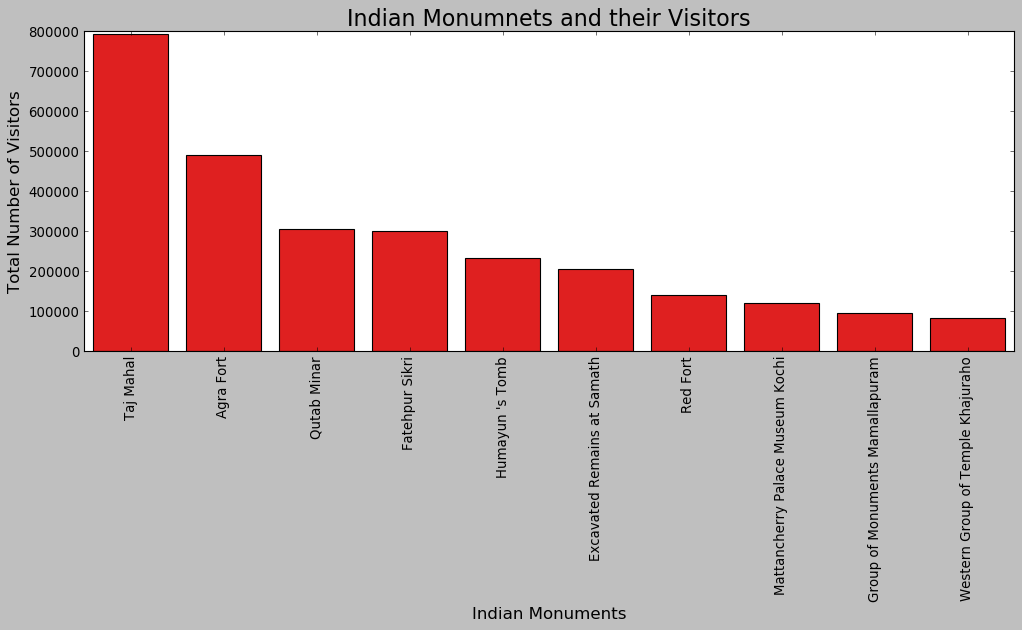

In [9]:
plt.style.use('_classic_test')
plt.rcParams['figure.figsize'] = (15, 5)

sns.barplot(indian_monuments['Name of Monument'][:10],
            indian_monuments['No. of Foreign visitors'][:10],
            color = 'red')

plt.title('Indian Monumnets and their Visitors', fontsize = 20)
plt.xlabel('Indian Monuments', fontsize = 15)
plt.ylabel('Total Number of Visitors', fontsize = 15)
plt.xticks(rotation = 90)
plt.show()

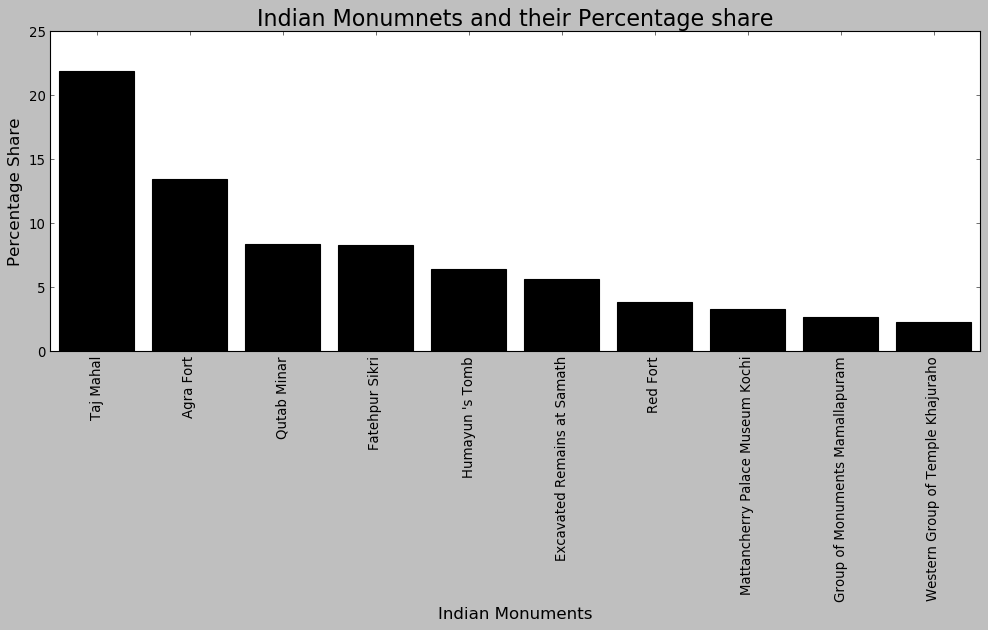

In [10]:
plt.style.use('_classic_test')
plt.rcParams['figure.figsize'] = (15, 5)

sns.barplot(indian_monuments['Name of Monument'][:10],
            indian_monuments['Percentage share'][:10],
            color = 'black')
            
plt.title('Indian Monumnets and their Percentage share', fontsize = 20)
plt.xlabel('Indian Monuments', fontsize = 15)
plt.ylabel('Percentage Share', fontsize = 15)
plt.xticks(rotation = 90)
plt.show()

In [11]:
### lets check the profile of these datasets

# profile report for Indian Monuments
profile.ProfileReport(indian_monuments)

## Tourist Analysis

In [12]:
# lets check the head of teh tourist visitors data
tourist.head()

,Name of Countries,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,USA,329147,348182,410803,526120,611165,696739,799062,804933,827140,931292,980688,1039947,1085309,1118983,1213624
1,UK,405472,387846,430917,555907,651803,734240,796191,776530,769251,759494,798249,788170,809444,942562,867601
2,BANGLADESH,431312,435867,454611,477446,456371,484401,480240,541884,468899,431962,463543,487397,524923,838860,1133879
3,SRILANKA,112813,108008,109098,128711,136400,154813,204084,218805,239995,266515,305853,296983,262345,301601,299513
4,CANADA,88600,93598,107671,135884,157643,176567,208214,222364,224069,242372,259017,256021,255222,268485,281306


In [13]:
# lets check the description of the dataset
x = tourist.describe()
x.style.bar(color = ['silver', 'gold'], align = 'mid')

,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
count,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20
mean,253728,241614,276115,350002,391861,444717,508150,528260,516770,577569,630922,657774,696760,767910,802713
std,560259,529408,604528,763013,862759,978195,1.11742e+06,1.16222e+06,1.13733e+06,1.27083e+06,1.38766e+06,1.44567e+06,1.53048e+06,1.68763e+06,1.76624e+06
min,13901,2946,10364,33442,41978,46623,50037,58065,53137,51739,48640,59846,93951,91589,88091
25%,41297,35195.5,41593.8,58834.2,68410,81925,91706.8,89762.8,93405,106709,119104,129933,136553,144652,154100
50%,68940,61728.5,73809,90620.5,99679,114580,140732,145780,142208,174362,200860,211060,245514,242932,239584
75%,166896,168052,184524,221274,232325,253526,276220,302244,297221,307877,345276,344586,327990,435916,441535
max,2.53728e+06,2.38436e+06,2.72621e+06,3.4567e+06,3.91861e+06,4.44717e+06,5.0815e+06,5.2826e+06,5.1677e+06,5.77569e+06,6.30922e+06,6.57774e+06,6.9676e+06,7.6791e+06,8.02713e+06


In [14]:
# lets check the description of the dataset
x = tourist.corr()
x.style.bar(color = ['silver'], align = 'mid')

,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
2001,1,0.999385,0.999318,0.998929,0.997889,0.997375,0.996244,0.99672,0.995484,0.993168,0.992773,0.992434,0.992146,0.995846,0.996927
2002,0.999385,1,0.999777,0.99862,0.997135,0.996581,0.99532,0.996029,0.994966,0.992603,0.992205,0.991825,0.991427,0.995416,0.996884
2003,0.999318,0.999777,1,0.999382,0.998151,0.997733,0.996838,0.997472,0.996566,0.994682,0.994318,0.994013,0.993679,0.996919,0.997836
2004,0.998929,0.99862,0.999382,1,0.99957,0.999353,0.998883,0.999133,0.998485,0.996982,0.996578,0.996304,0.996065,0.998194,0.998104
2005,0.997889,0.997135,0.998151,0.99957,1,0.999938,0.999567,0.999389,0.999076,0.997617,0.99711,0.996828,0.996563,0.997974,0.997224
2006,0.997375,0.996581,0.997733,0.999353,0.999938,1,0.999757,0.999541,0.999339,0.998058,0.997565,0.997296,0.996966,0.99808,0.997072
2007,0.996244,0.99532,0.996838,0.998883,0.999567,0.999757,1,0.999837,0.999789,0.999045,0.998672,0.998451,0.998116,0.998561,0.997086
2008,0.99672,0.996029,0.997472,0.999133,0.999389,0.999541,0.999837,1,0.999828,0.99923,0.998982,0.998818,0.998536,0.99923,0.998057
2009,0.995484,0.994966,0.996566,0.998485,0.999076,0.999339,0.999789,0.999828,1,0.999576,0.99932,0.999116,0.998748,0.998958,0.997407
2010,0.993168,0.992603,0.994682,0.996982,0.997617,0.998058,0.999045,0.99923,0.999576,1,0.999939,0.999855,0.999574,0.998947,0.996973


In [15]:
# lets check the description of the dataset
x = tourist.cov()
x.style.bar(color = ['aqua'], align = 'mid')

,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
2001,3.13891e+11,2.96423e+11,3.38461e+11,4.27027e+11,4.82349e+11,5.46604e+11,6.23693e+11,6.49008e+11,6.34321e+11,7.07132e+11,7.71831e+11,8.03823e+11,8.50731e+11,9.41584e+11,9.86512e+11
2002,2.96423e+11,2.80273e+11,3.19971e+11,4.03388e+11,4.55443e+11,5.16094e+11,5.88802e+11,6.12844e+11,5.9908e+11,6.67813e+11,7.28912e+11,7.59093e+11,8.03302e+11,8.8935e+11,9.32149e+11
2003,3.38461e+11,3.19971e+11,3.65454e+11,4.60977e+11,5.20598e+11,5.90005e+11,6.73375e+11,7.00817e+11,6.85186e+11,7.64168e+11,8.34113e+11,8.68717e+11,9.19369e+11,1.01708e+12,1.06543e+12
2004,4.27027e+11,4.03388e+11,4.60977e+11,5.82188e+11,6.58013e+11,7.45892e+11,8.51652e+11,8.86018e+11,8.66481e+11,9.66735e+11,1.05518e+12,1.09899e+12,1.16318e+12,1.28536e+12,1.34511e+12
2005,4.82349e+11,4.55443e+11,5.20598e+11,6.58013e+11,7.44354e+11,8.43894e+11,9.63646e+11,1.0021e+12,9.80334e+11,1.09381e+12,1.19376e+12,1.24331e+12,1.3159e+12,1.45307e+12,1.51961e+12
2006,5.46604e+11,5.16094e+11,5.90005e+11,7.45892e+11,8.43894e+11,9.56865e+11,1.09279e+12,1.13635e+12,1.11179e+12,1.24071e+12,1.3541e+12,1.41032e+12,1.49257e+12,1.64766e+12,1.72267e+12
2007,6.23693e+11,5.88802e+11,6.73375e+11,8.51652e+11,9.63646e+11,1.09279e+12,1.24862e+12,1.29847e+12,1.2706e+12,1.4187e+12,1.54854e+12,1.61292e+12,1.70696e+12,1.88308e+12,1.96788e+12
2008,6.49008e+11,6.12844e+11,7.00817e+11,8.86018e+11,1.0021e+12,1.13635e+12,1.29847e+12,1.35075e+12,1.3216e+12,1.47585e+12,1.61112e+12,1.6782e+12,1.77615e+12,1.95988e+12,2.04877e+12
2009,6.34321e+11,5.9908e+11,6.85186e+11,8.66481e+11,9.80334e+11,1.11179e+12,1.2706e+12,1.3216e+12,1.29352e+12,1.44474e+12,1.57715e+12,1.64275e+12,1.73848e+12,1.91739e+12,2.00359e+12
2010,7.07132e+11,6.67813e+11,7.64168e+11,9.66735e+11,1.09381e+12,1.24071e+12,1.4187e+12,1.47585e+12,1.44474e+12,1.61502e+12,1.76338e+12,1.83694e+12,1.94415e+12,2.14244e+12,2.2378e+12


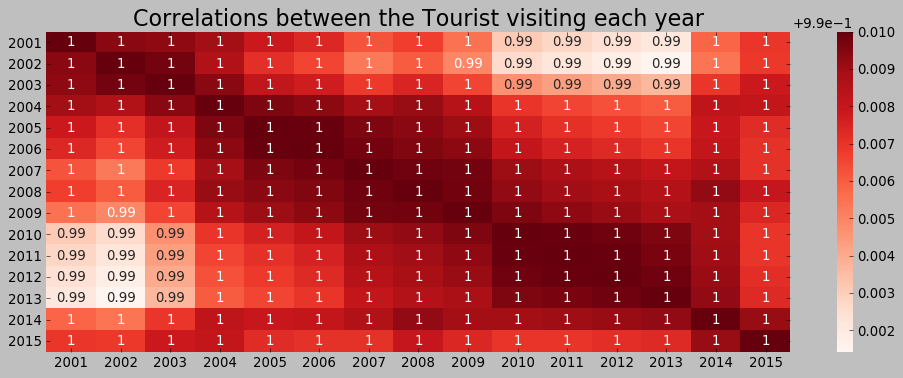

In [16]:
# lets also check the heatmaps

sns.heatmap(tourist.corr(),
            cmap = 'Reds',
            annot = True)
plt.title('Correlations between the Tourist visiting each year', fontsize = 20)
plt.show()

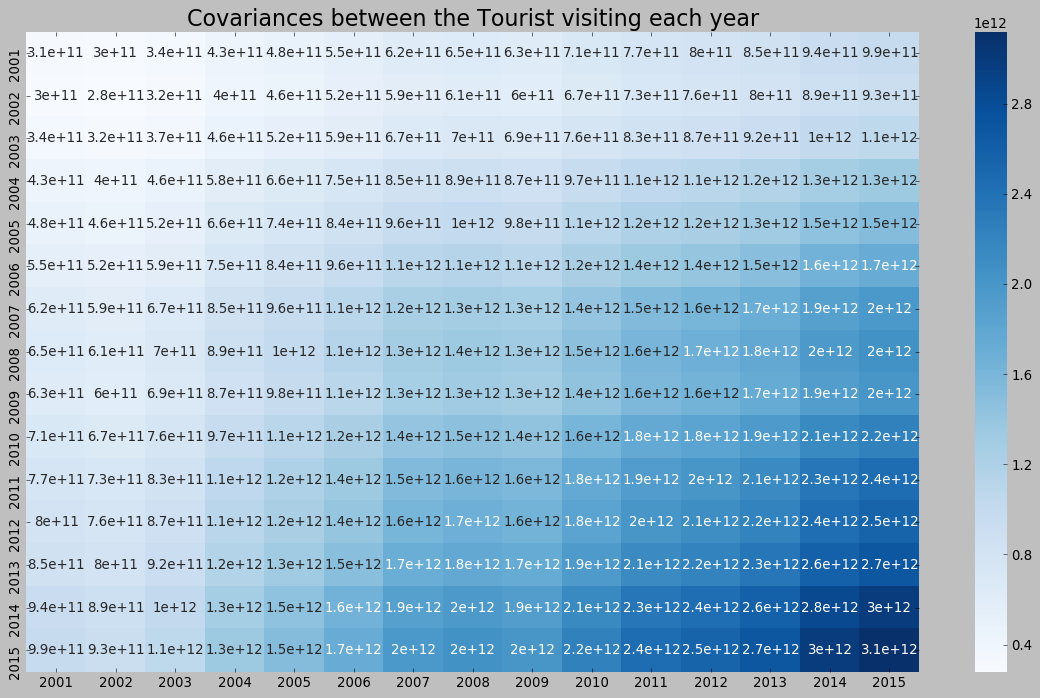

In [17]:
# lets also check the heatmaps

plt.rcParams['figure.figsize'] = (18, 10)
sns.heatmap(tourist.cov(),
            cmap = 'Blues',
            annot = True)
plt.title('Covariances between the Tourist visiting each year', fontsize = 20)
plt.show()

In [18]:
# lets check the number of unique countries are there
tourist['Name of Countries'].nunique()

20

In [19]:
# lets check the columns in tourist data
tourist.columns

Index(['Name of Countries',                2001,                2002,
                      2003,                2004,                2005,
                      2006,                2007,                2008,
                      2009,                2010,                2011,
                      2012,                2013,                2014,
                      2015],
      dtype='object')

In [20]:
# lets check the Tourists in Different Countries in the Year 2015
x = tourist[['Name of Countries', 2015]]
x.style.bar(color = 'pink', align = 'mid')

,Name of Countries,2015
0,USA,1213624
1,UK,867601
2,BANGLADESH,1133879
3,SRILANKA,299513
4,CANADA,281306
5,FRANCE,230854
6,GERMANY,248314
7,JAPAN,207415
8,AUSTRALIA,263101
9,MALAYSIA,272941


In [21]:
def tourist_check(x):
    t = tourist[['Name of Countries', x]]
    return t.style.bar(color = 'gold', align = 'mid')

In [22]:
tourist_check(2005)

,Name of Countries,2005
0,USA,611165
1,UK,651803
2,BANGLADESH,456371
3,SRILANKA,136400
4,CANADA,157643
5,FRANCE,152258
6,GERMANY,120243
7,JAPAN,103082
8,AUSTRALIA,96258
9,MALAYSIA,96276


In [23]:
tourist_check(2001)

,Name of Countries,2001
0,USA,329147
1,UK,405472
2,BANGLADESH,431312
3,SRILANKA,112813
4,CANADA,88600
5,FRANCE,102434
6,GERMANY,80011
7,JAPAN,80634
8,AUSTRALIA,52691
9,MALAYSIA,57869


In [24]:
x = tourist['Name of Countries'][:10].values
x = x.tolist()
x

['USA',
 'UK',
 'BANGLADESH',
 'SRILANKA',
 'CANADA',
 'FRANCE',
 'GERMANY',
 'JAPAN',
 'AUSTRALIA',
 'MALAYSIA']

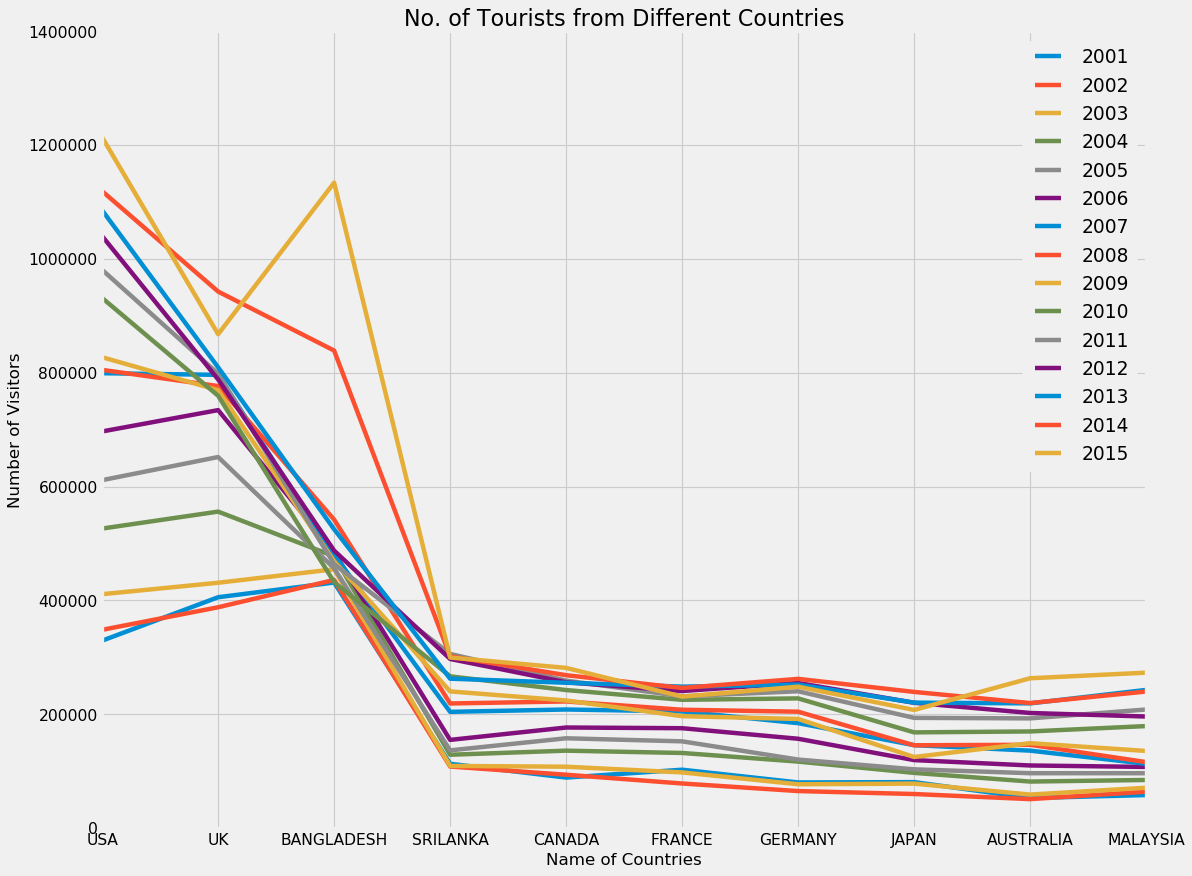

In [25]:
plt.rcParams['figure.figsize'] = (15, 12)
plt.style.use('fivethirtyeight')

tourist[:10].plot(kind = 'line')
plt.title('No. of Tourists from Different Countries', fontsize = 20)
plt.xticks(np.arange(10), ('USA',
 'UK',
 'BANGLADESH',
 'SRILANKA',
 'CANADA',
 'FRANCE',
 'GERMANY',
 'JAPAN',
 'AUSTRALIA',
 'MALAYSIA'))
plt.xlabel('Name of Countries', fontsize = 15)
plt.ylabel('Number of Visitors', fontsize = 15)
plt.show()

In [26]:
plt.rcParams['figure.figsize'] = (15, 7)
plt.style.use('fivethirtyeight')

@interact_manual
def barplot(column = ['Name of Countries'],
            column2 = list(tourist.select_dtypes('number').columns),
            colors = ['copper','spring','summer','Reds','Blues','Greens']):
    sns.barplot(tourist[column][:10],
                tourist[column2],
                palette = colors)
    plt.xticks(rotation  = 90)
    plt.show()

interactive(children=(Dropdown(description='column', options=('Name of Countries',), value='Name of Countries'…

In [59]:
@interact
def check(column = 2015, x = 1000000):
    return tourist[:10].loc[tourist[column] > x]

interactive(children=(IntSlider(value=2015, description='column', max=6045, min=-2015), IntSlider(value=100000…

## Travelling Analysis

In [28]:
# lets check the head of the data
travel.head()

,Unnamed: 0,Visited From:,Distance (From Kadamba Bus Terminus):,Trip Duration (Including Travel):,Place Location:,Transportation Options:,Travel Tips:,title
0,0,-,-,-,-,-,-,Panjim (Goa)
1,1,Kadamba Bus Terminus,14 Kms,2 Hours,Not Available,Bus / Cab / Auto / Rental Bike,1. Baga Beach (1.6 kms) can also be visited fr...,Calangute Beach
2,2,Kadamba Bus Terminus,15 Kms,1-2 Hours,Between Calangute & Anjuna Beaches,Bus / Cab / Auto / Rental Bike,1. Calangute Beach (1.6 kms) can also be visit...,Baga Beach
3,3,Kadamba Bus Terminus,9 Kms,1-2 Hours,Old Goa,Bus / Cab / Auto / Rental Bike,'Following places can be visited from here:1. ...,Basilica Of Bom Jesus
4,4,Kadamba Bus Terminus,15 Kms,2-3 Hours,Past Candolim Beach,Bus / Cab / Auto / Rental Bike,1. Sinquerim Beach (3.3 Kms) can also be visit...,Aguada Fort


In [29]:
# lets check the tail of the data
travel.tail()

,Unnamed: 0,Visited From:,Distance (From Kadamba Bus Terminus):,Trip Duration (Including Travel):,Place Location:,Transportation Options:,Travel Tips:,title
38,38,Arambol Beach,-,1-2 Hours,"South Of Arambol Beach, Near Pernem Village",Cab / Auto / Rental Bike,1. This place is usually visited from Arambol ...,Mandrem Beach
39,39,Dona Paula Beach,8 Kms,1-2 Hours,North Of Dona Paula Beach,Cab / Auto / Rental Bike,1.This place is usually visited from Dona Paul...,Miramar Beach
40,40,Palolem Beach,-,1 Hour,"Past Palolem Beach, Between Rajbagh & Colomb B...",Cab / Auto / Rental Bike,1. This place is usually visited from Palolem ...,Patnem Beach
41,41,Colva Beach,-,1 Hour,Between Colva And Benaulim Beaches,Cab / Auto / Rental Bike,1. This place is usually visited from Colva Be...,Sernabatim Beach
42,42,Palolem Beach,-,1 Hour,North Of Galgibagh Beach,Cab / Auto / Rental Bike,1. This place is usually visited from Palolem ...,Talpona Beach


In [30]:
# profile report for Travelling Dataset
profile.ProfileReport(travel)

In [31]:
# lets check the unique title

travel['title'].nunique()

43

In [32]:
# lets check the missing values in the travel dataset
travel.isnull().sum()

Unnamed_0                                0
Visited_From_                            0
Distance_(From_Kadamba_Bus_Terminus)_    0
Trip_Duration_(Including_Travel)_        0
Place_Location_                          0
Transportation_Options_                  0
Travel_Tips_                             0
title                                    0
dtype: int64

In [33]:
# lets check the column names
travel.columns

Index(['Unnamed_0', 'Visited_From_', 'Distance_(From_Kadamba_Bus_Terminus)_',
       'Trip_Duration_(Including_Travel)_', 'Place_Location_',
       'Transportation_Options_', 'Travel_Tips_', 'title'],
      dtype='object')

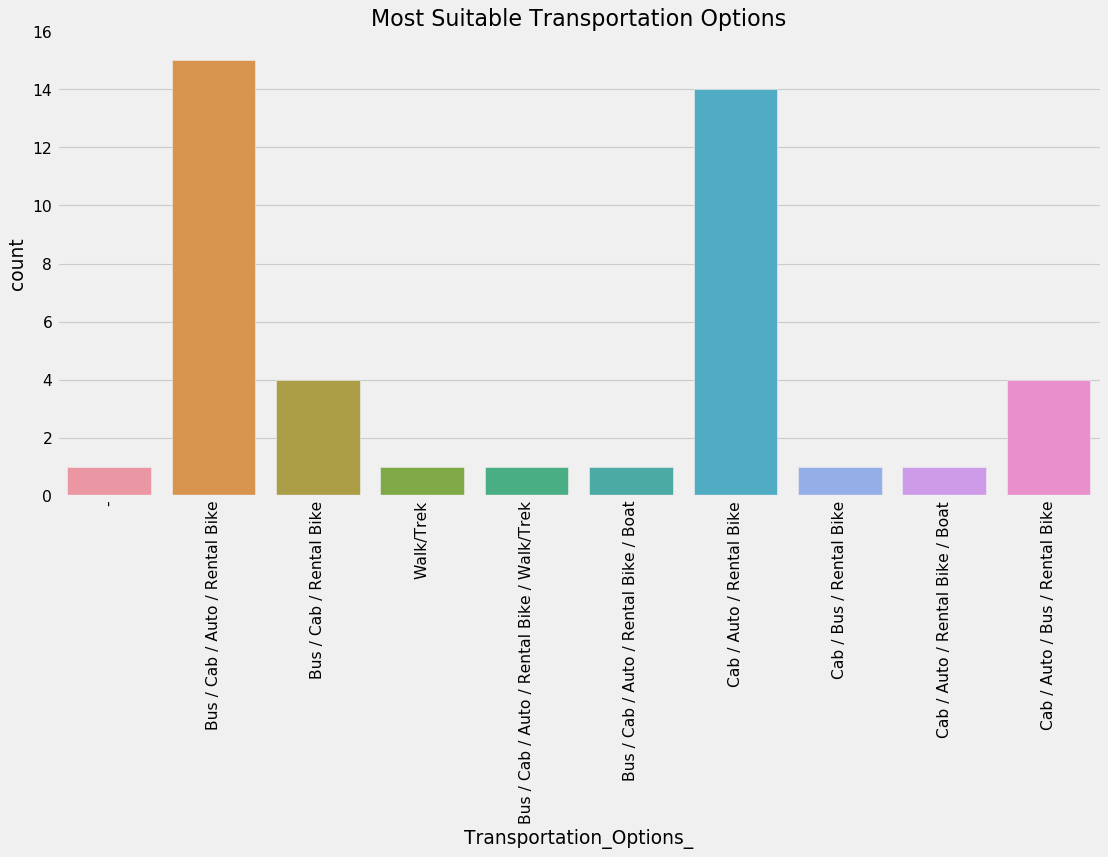

In [34]:
plt.rcParams['figure.figsize'] = (15, 7)

sns.countplot(travel['Transportation_Options_'])
plt.title('Most Suitable Transportation Options', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

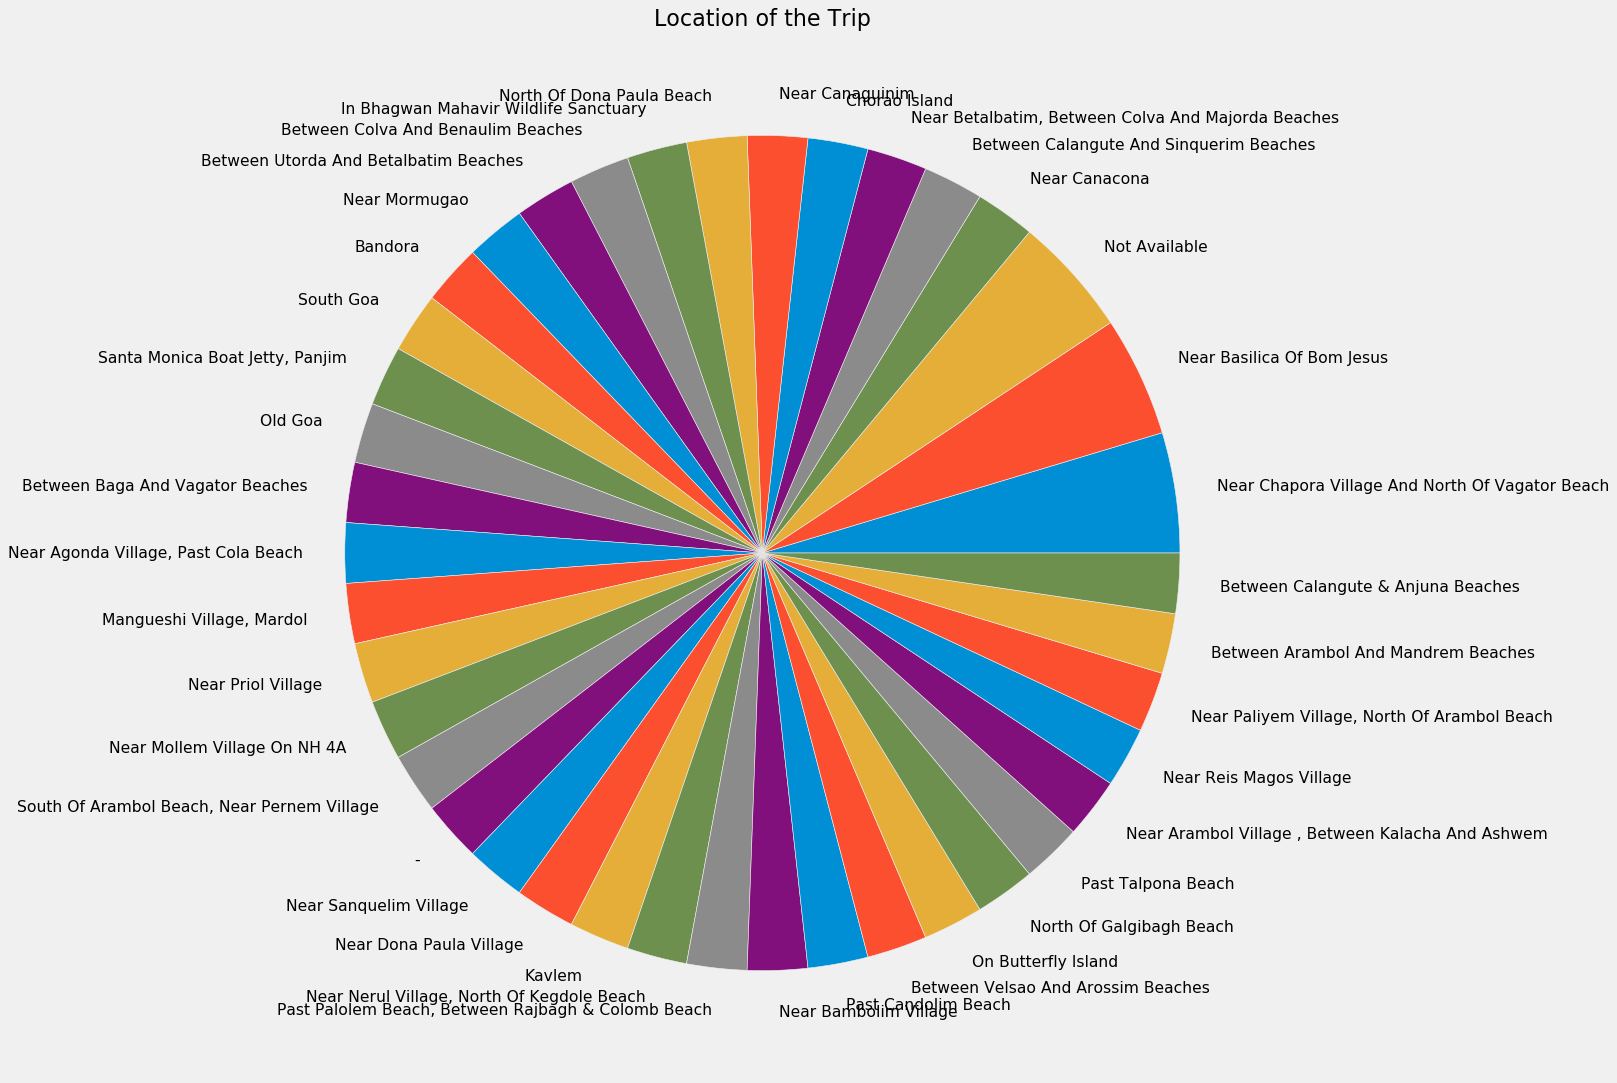

In [35]:
plt.rcParams['figure.figsize'] = (15, 25)

travel['Place_Location_'].value_counts().plot(kind = 'pie')
plt.axis('off')
plt.title('Location of the Trip', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

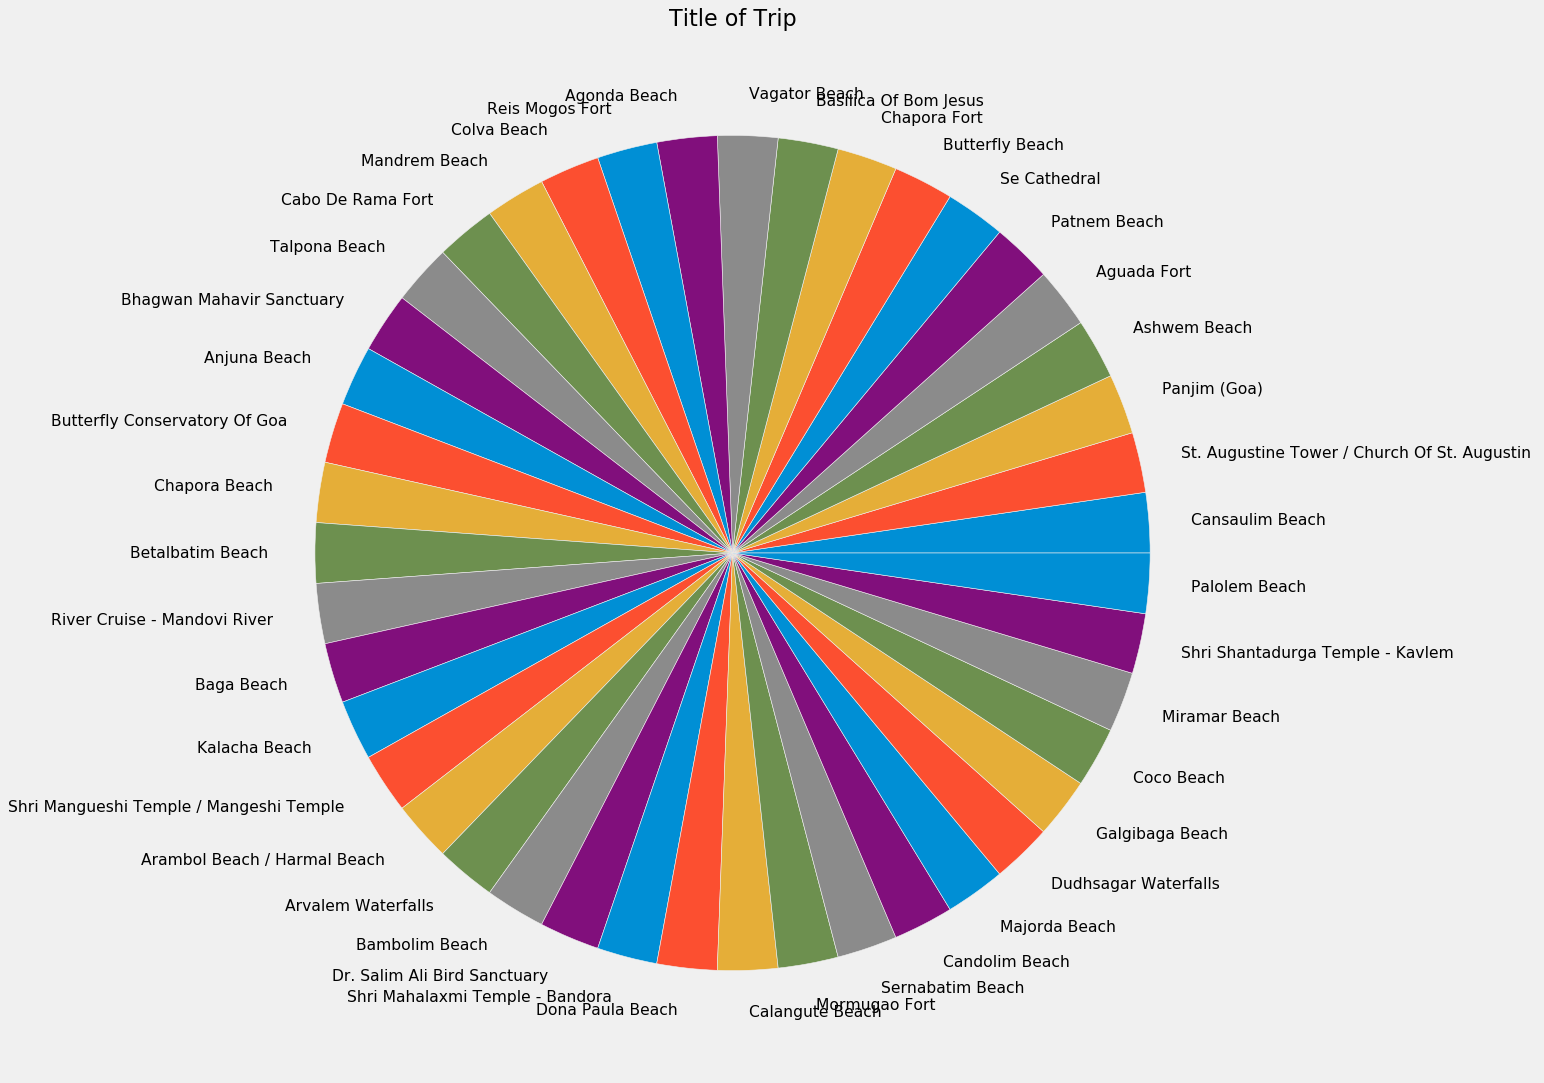

In [36]:
plt.rcParams['figure.figsize'] = (15, 18)

travel['title'].value_counts().plot(kind = 'pie')
plt.axis('off')
plt.title('Title of Trip', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

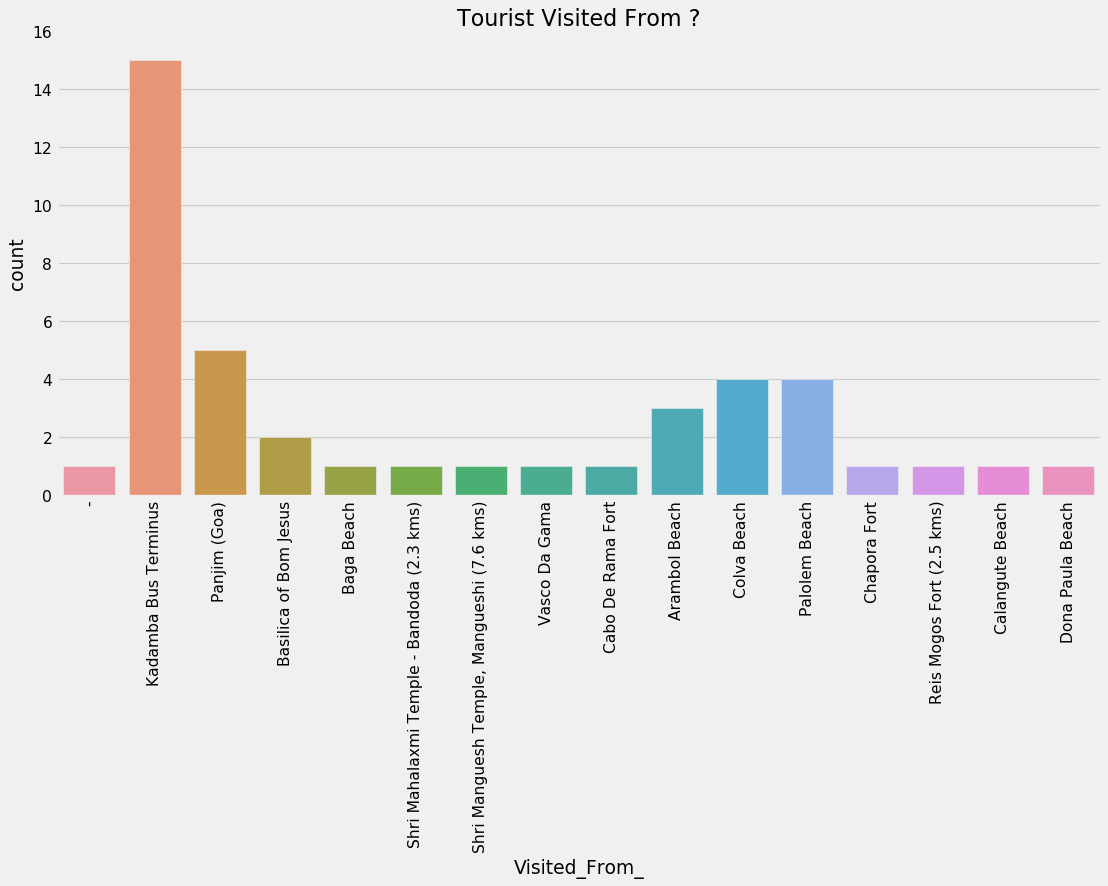

In [37]:
plt.rcParams['figure.figsize'] = (15, 7)

sns.countplot(travel['Visited_From_'])
plt.title('Tourist Visited From ?', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

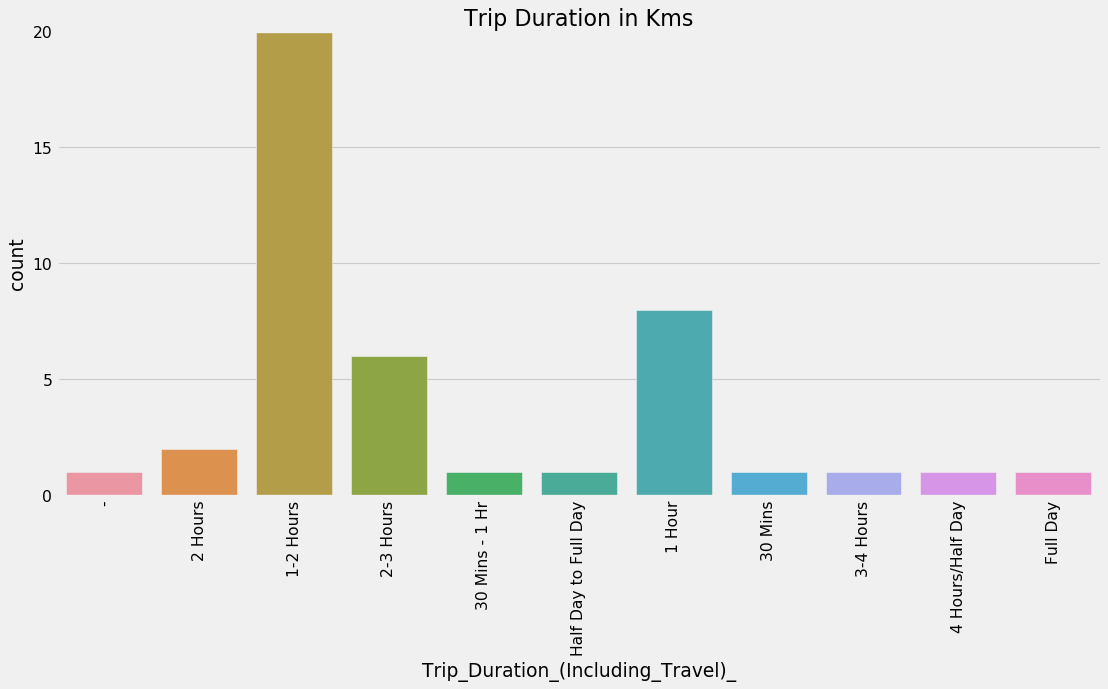

In [38]:
plt.rcParams['figure.figsize'] = (15, 7)

sns.countplot(travel['Trip_Duration_(Including_Travel)_'])
plt.title('Trip Duration in Kms', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

In [39]:
# lets check the travelling tips

travel['Travel_Tips_'][:10]

0                                                    -
1    1. Baga Beach (1.6 kms) can also be visited fr...
2    1. Calangute Beach (1.6 kms) can also be visit...
3    'Following places can be visited from here:1. ...
4    1. Sinquerim Beach (3.3 Kms) can also be visit...
5    1. Chapora Beach and Chapora Fort (2 kms) can ...
6    Following places are neary by and usually visi...
7    Following places can be visited from Colva Bea...
8    This place is usually visited from Basilica of...
9    1. Reis Magos Church (0.3 kms) can also be vis...
Name: Travel_Tips_, dtype: object

In [40]:
# named entity recognition

nlp = spacy.load('en_core_web_sm')

def explain_text_entities(text):
    doc = nlp(text)
    for ent in doc.ents:
        print(f'Entity: {ent}, Label: {ent.label_}, {spacy.explain(ent.label_)}')
        
for i in range(1, 21):
    one_sentence = travel['Travel_Tips_'][i]
    doc = nlp(one_sentence)
    spacy.displacy.render(doc, style='ent',jupyter=True)

In [41]:
# lets check the first five travelling tips

print("First Tip : \n\n", travel['Travel_Tips_'][1])
print("\n Second Tip : \n\n", travel['Travel_Tips_'][2])
print("\n Third Tip : \n\n", travel['Travel_Tips_'][3])
print("\n Forth Tip : \n\n", travel['Travel_Tips_'][4])
print("\n First Tip : \n\n", travel['Travel_Tips_'][5])

First Tip : 

 1. Baga Beach (1.6 kms) can also be visited from this place.2. Candolim Beach (5 kms) can also be visited from this place.3. St. Alex Church (2.1 kms) can also be visited from this place.4. Our Lady of Piety Church (0.8 kms) can also be visited from this place.5. Sinquerim Beach (7 kms), Mae De Deus Church, Saligao (4.5 kms)can also be visited from this place.

 Second Tip : 

 1. Calangute Beach (1.6 kms) can also be visited from this place.2. Anjuna Beach (7 kms) can also be visited from this beach.3. Swimming is not safe from end May to early October.

 Third Tip : 

 'Following places can be visited from here:1. Se Cathedral (230 mts), Church of St. Francis of Assissi (240 mts), Museum of Christian Art (0.8kms), Viceroy's Arch (0.6 kms), Church of St. John of God (0.8 kms), Church of Our Lady of Rosary (1 km), St. Agustin Tower (1 km),San Pedro Church (1.9 kms), Our Lady of Help Church (2 km), Church of St Cajetan (700 mts), Chapel of St. Francis Xavier (1.4 kms), Ch

In [42]:
help(gensim.summarization.keywords)

Help on function keywords in module gensim.summarization.keywords:

keywords(text, ratio=0.2, words=None, split=False, scores=False, pos_filter=('NN', 'JJ'), lemmatize=False, deacc=True)
    Get most ranked words of provided text and/or its combinations.
    
    Parameters
    ----------
    
    text : str
        Input text.
    ratio : float, optional
        If no "words" option is selected, the number of sentences is reduced by the provided ratio,
        else, the ratio is ignored.
    words : int, optional
        Number of returned words.
    split : bool, optional
        Whether split keywords if True.
    scores : bool, optional
        Whether score of keyword.
    pos_filter : tuple, optional
        Part of speech filters.
    lemmatize : bool, optional
        If True - lemmatize words.
    deacc : bool, optional
        If True - remove accentuation.
    
    Returns
    -------
    result: list of (str, float)
        If `scores`, keywords with scores **OR**
    resul

In [43]:
from gensim.summarization import keywords
keywords('1. Baga Beach (1.6 kms) can also be visited from this place.2. Candolim Beach (5 kms) \
          can also be visited from this place.3. St. Alex Church (2.1 kms) can also be visited \
          from this place.4. Our Lady of Piety Church (0.8 kms) can also be visited from this \
          place.5. Sinquerim Beach (7 kms), Mae De Deus Church, Saligao (4.5 kms)can also be \
          visited from this place.')

'church\nbeach'

In [44]:
print("Keywords in First Tip :")
print(keywords(travel['Travel_Tips_'][1]))


Keywords in First Tip :
church
beach
